In [46]:
import gymnasium as gym
import cv2
import numpy as np
import matplotlib.pyplot as plt


# env = gym.make("ALE/Breakout-v5", render_mode='rgb_array')
# env = gym.make("ALE/Assault-v5", render_mode='rgb_array')
# env = gym.make("ALE/Solaris-v5", render_mode='rgb_array')
env = gym.make("ALE/StarGunner-v5", render_mode='rgb_array')
env = gym.make("CarRacing-v2", render_mode='rgb_array')

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 75, 150)
    cv2.imshow('ATARI', edges)
    if cv2.waitKey(20) == 27:
        break
    # plt.imshow(edges); plt.show()
    if terminated or truncated:
        observation, info = env.reset()
    
env.close()
cv2.destroyAllWindows()

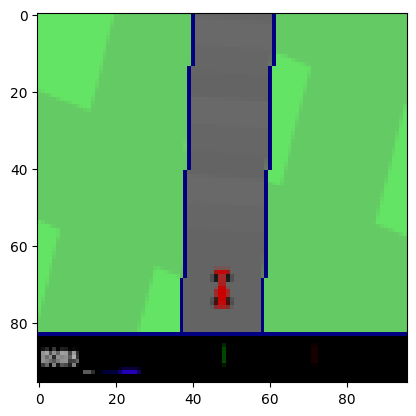

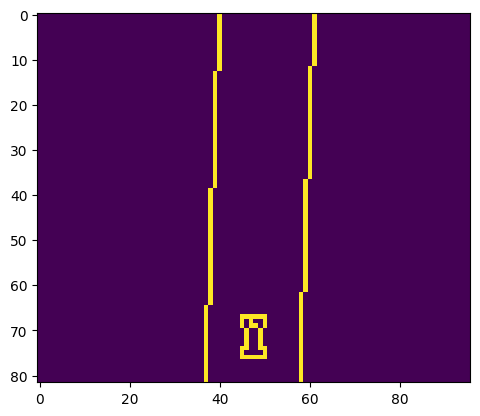

In [45]:
img=observation.copy()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=250)
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)

plt.imshow(img); plt.show()
plt.imshow(edges[:-14, :]); plt.show()

In [ ]:
img.shape

(96, 96, 3)